In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path='G:/我的雲端硬碟/轉譯醫學/Data/MJ/mjdb_full.db_data.csv'
df=pd.read_csv(file_path,index_col=0)

C:\Users\tsako0503\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Raw data (1448034, 489)

In [5]:
df.shape

(1448034, 489)

### 分析欄位####
gender <br>
age <br>
g_bmi <br>
mdrug07 (高血脂)<br>
g_ssr (右手血壓) <br>
smokeornot_03 (抽菸)空值太多去除<br>
drinkornot_98 (喝酒)<br>
psick10 (糖尿病)

In [3]:
select_col='''
yr
pid
psick11
gender
age
g_ssr
g_bmi
mdrug07
drinkornot_98
psick10
'''

select_col_l=select_col.split()

### Remove repeat heath check for same individual
### Data (615353, 10)

In [4]:
#刪除重複的人，取最後一次
df_last=df[select_col_l].drop_duplicates(subset='pid',keep='last',inplace=False).reset_index(drop=True)
print(df_last.shape)
df_last.head(3)

(615353, 10)


,yr,pid,psick11,gender,age,g_ssr,g_bmi,mdrug07,drinkornot_98,psick10
0,2007,a19k583189,0.0,2,25.0,110.0,20.490217,0.0,1.0,0.0
1,1998,a19k005666,0.0,1,16.0,112.0,18.794434,0.0,1.0,0.0
2,2006,a19k143055,0.0,1,50.0,110.0,27.445372,0.0,NaN,0.0


In [5]:
## 看個欄位空值
df_last.isna().sum().sort_values()


yr                    0
pid                   0
gender                0
age                  71
g_bmi              1103
psick10            5919
psick11            5932
mdrug07            9263
g_ssr             31015
drinkornot_98    136208
dtype: int64

### 'gender' distribution (no missing value)

2    319674
1    295679
Name: gender, dtype: int64


Text(0.5, 0, 'Gender')

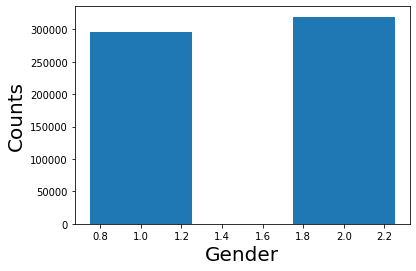

In [6]:
g_bar_counts=df_last['gender'].value_counts()
print(g_bar_counts)
plt.bar(g_bar_counts.index,g_bar_counts.values,width=0.5)
plt.ylabel("Counts",size=20)
plt.xlabel("Gender",size=20)

### Handling Missing values

#### mean substitution : continuous data (age,sbp,BMI)
#### mode substitution: categorical data

##### other ways:
* One hot encoding(get_dummy)
* Missing value for categorical data :
    1. mode
    2. Multiple imputation
    3. 可以透過將沒有含有NaN值的同一個feature裡的值當作training set,用machine learning演算法來預測含有NaN值的test
    4. KNN

41.829164513182576
39.0


C:\Users\tsako0503\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tsako0503\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


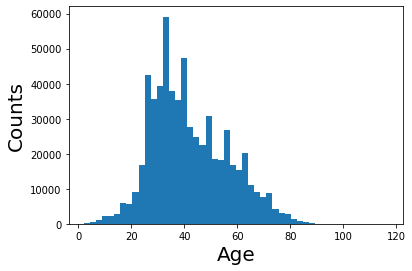

In [7]:
## 用平均填補年齡缺值

plt.hist(df_last['age'],bins=50)
plt.ylabel("Counts",size=20)
plt.xlabel("Age",size=20)
print(df_last['age'].mean())
print(df_last['age'].median())
df_last['age']=df_last['age'].fillna(df_last['age'].mean())



In [8]:
#填補BMI值 (分別依性別不同給予補不同的bmi平均)
df_last['gender']=df_last['gender'].astype(str)
group_by_sex=df_last.groupby('gender')
group_by_sex.mean().loc[:,'g_bmi']

man_bmi=df_last[df_last.g_bmi.isna()][df_last.gender=='1'].fillna(group_by_sex.mean().loc[:,'g_bmi'][0])

woman_bmi=df_last[df_last.g_bmi.isna()][df_last.gender=='2'].fillna(group_by_sex.mean().loc[:,'g_bmi'][1])
df_last[df_last.g_bmi.isna()]=pd.concat([man_bmi, woman_bmi],axis=0)
df_last.isna().sum().sort_values()

C:\Users\tsako0503\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\tsako0503\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


yr                    0
pid                   0
gender                0
age                   0
g_bmi                 0
psick10            5851
psick11            5864
mdrug07            9193
g_ssr             30025
drinkornot_98    135271
dtype: int64

23.230609376654645
22.896469


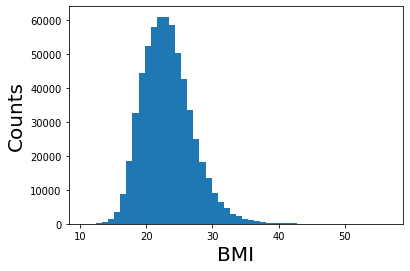

In [9]:
plt.hist(df_last['g_bmi'],bins=50)
plt.ylabel("Counts",size=20)
plt.xlabel("BMI",size=20)
print(df_last['g_bmi'].mean())
print(df_last['g_bmi'].median())


118.7313739023082
116.0


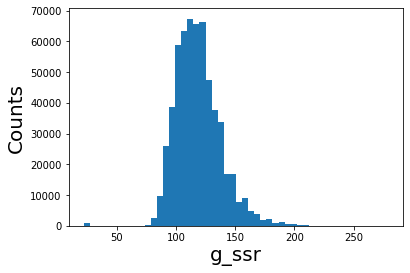

In [10]:
##血壓分布
plt.hist(df_last['g_ssr'],bins=50)
plt.ylabel("Counts",size=20)
plt.xlabel('g_ssr',size=20)
print(df_last['g_ssr'].mean())
print(df_last['g_ssr'].median())
#用平均補血壓值
df_last['g_ssr']=df_last['g_ssr'].fillna(df_last['g_ssr'].mean())

### Drop 'psick11' = nan and convert data type from float to integer

In [23]:
##去除中風欄位為空值
df_last=df_last.dropna(axis=0, subset=['psick11'], how='any')
df_last.psick11.astype(int)

print(df_last.psick11.value_counts())
df_last.isna().sum().sort_values()

0.0     605862
1.0       3559
22.0        54
24.0        14
Name: psick11, dtype: int64


yr                    0
pid                   0
psick11               0
gender                0
age                   0
g_ssr                 0
g_bmi                 0
psick10               0
mdrug07            3589
drinkornot_98    129409
dtype: int64

## 篩選年分於1998-2016間資料

In [24]:
df_last_y=df_last[(df_last['yr']<2017)&(df_last['yr']>=1998)]
df_last_y.isna().sum().sort_values()

yr                   0
pid                  0
psick11              0
gender               0
age                  0
g_ssr                0
g_bmi                0
mdrug07              0
psick10              0
drinkornot_98    42881
dtype: int64

## Dataset (5720, 11)

* 隨機抽樣2860個健康人與2860中風的人

In [25]:
health_people=df_last_y[(df_last_y.psick11==0)].sample(n=2860, axis=0,random_state=1)  # random_state 類似seed的效果可設任一值
stroke_people=df_last_y[(df_last_y.psick11==1)]
#合併
data=pd.concat([health_people, stroke_people],axis=0)
print(data.shape)
print(data.isna().sum().sort_values())

(5720, 10)
yr                 0
pid                0
psick11            0
gender             0
age                0
g_ssr              0
g_bmi              0
mdrug07            0
psick10            0
drinkornot_98    445
dtype: int64


### Categorical missing values

In [26]:
# drinkornot_98 轉為類別資料(先補空值) 類別1-5: 1-->0(沒有喝酒),2.3.4.5-->1(有喝酒)
print(data.drinkornot_98.value_counts())
data.drinkornot_98=data.drinkornot_98.fillna(6.0).astype(int)

def get_drinkornot_group(x):
    if x==1:
        return 0
    elif 2<=x<=5:
        return 1
    else:
        return 0
    
data['drinkornot_group']=data['drinkornot_98'].map(get_drinkornot_group)
print(data.drinkornot_group.value_counts())


1.000000     4126
3.000000      423
2.000000      398
4.000000      181
5.000000      144
22.346545       2
24.186417       1
Name: drinkornot_98, dtype: int64
0    4574
1    1146
Name: drinkornot_group, dtype: int64


### Model data (x, y)


In [27]:
# 排除不要放入的欄位
exclude_col=[i for i in data.columns if i not in ['yr','psick11','pid','drinkornot_98']]
data.gender=data.gender.astype(int)

print(data.isna().sum().sort_values())
print(data.shape)
#y (中風與否label)
y=np.array(data.psick11.astype(int))

#X
x=np.array(data[exclude_col])


yr                  0
pid                 0
psick11             0
gender              0
age                 0
g_ssr               0
g_bmi               0
mdrug07             0
drinkornot_98       0
psick10             0
drinkornot_group    0
dtype: int64
(5720, 11)


## Build model

In [31]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel


In [32]:
# Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier\
, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [33]:
## 切割資料
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [34]:
clfs = []
seed = 3

clfs.append(("GaussianNB", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GaussianNB", GaussianNB())])))
clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(C=1.0,random_state=5))]))) #　Ｃ=>0 浮點數代表正規化的效力，越大越沒有標準化

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state=5))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(random_state=5))]))) 
clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                      ("ExtraTrees", ExtraTreesClassifier(random_state=5))])))
clfs

[('GaussianNB',
  Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('GaussianNB', GaussianNB(priors=None, var_smoothing=1e-09))],
           verbose=False)),
 ('LogReg',
  Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('LogReg',
                   LogisticRegression(C=1.0, class_weight=None, dual=False,
                                      fit_intercept=True, intercept_scaling=1,
                                      l1_ratio=None, max_iter=100,
                                      multi_class='auto', n_jobs=None,
                                      penalty='l2', random_state=5,
                                      solver='lbfgs', tol=0.0001, verbose=0,
                                      warm_start=False))],
           verbose=False)),
 ('DecisionTreeClassifier',
  Pipeline(memory=N

In [35]:
scoring = 'accuracy'
n_folds = 10

results, names, modelname  = [], [] ,['model-name'] 

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.externals import joblib #存取model
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

msgL, accuracyL, f1L, precisionL, recallL  = [], ['accuracy_score'], ['f1_score'], ['precision_score'], ['recall_score']


C:\Users\tsako0503\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### 跑類別str 會出錯

C:\Users\tsako0503\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GaussianNB: 0.762014 (+/- 0.014307)
GaussianNBok


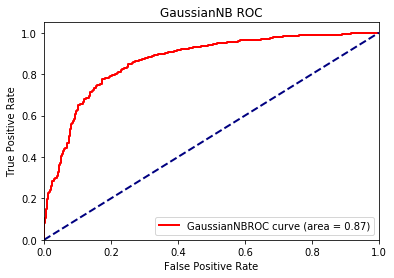

C:\Users\tsako0503\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogReg: 0.811844 (+/- 0.018377)
LogRegok


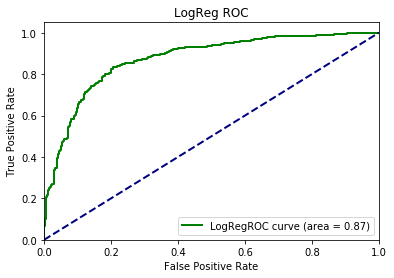

C:\Users\tsako0503\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DecisionTreeClassifier: 0.714601 (+/- 0.012453)
DecisionTreeClassifierok


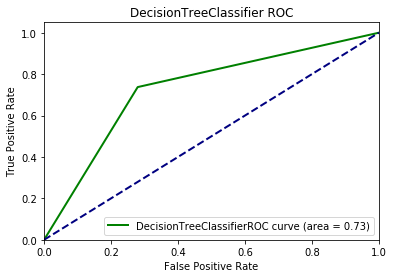

C:\Users\tsako0503\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForestClassifier: 0.796548 (+/- 0.010727)
RandomForestClassifierok


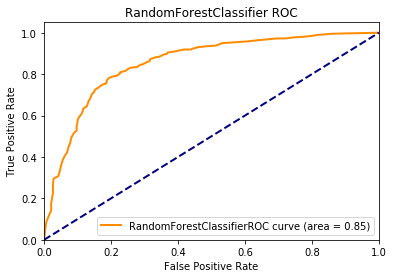

C:\Users\tsako0503\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ExtraTreesClassifier: 0.794799 (+/- 0.005494)
ExtraTreesClassifierok


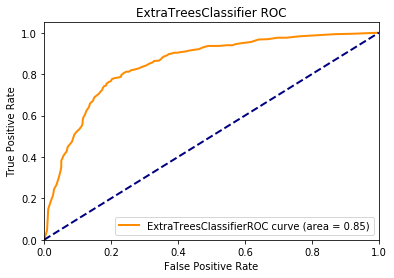

                        Accuracy  f1 score Precision    Recall
GaussianNB              0.755245  0.715447  0.869136  0.607945
LogReg                  0.811189  0.815068  0.808149  0.822107
DecisionTreeClassifier  0.729021  0.733677  0.729915  0.737478
RandomForestClassifier  0.788462  0.793515  0.784148  0.803109
ExtraTreesClassifier    0.780594  0.783434  0.782759  0.784111


In [24]:
for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)
    modelp = model.fit(X_train, y_train)
    if name == 'GaussianNB':
        #GaussianNBimportances = model.named_steps['GaussianNB'].coef_
        y_score=modelp.predict_proba(X_test)[:,1]
        clr='Red'
    if name == 'LogReg':
        LogRegimportances = model.named_steps['LogReg'].coef_
        y_score=modelp.decision_function(X_test)
        clr='Green'
        #joblib.dump(modelp,'logistic_F2.pkl')
        
    if name == 'DecisionTreeClassifier':
        DecisionTreesimportances = model.named_steps['DecisionTrees'].feature_importances_
        y_score=modelp.predict_proba(X_test)[:,1]
        
    if name == 'RandomForestClassifier':
        RandomForestimportances = model.named_steps['RandomForest'].feature_importances_
        y_score=modelp.predict_proba(X_test)[:,1]
        clr='darkorange'
    if name == 'ExtraTreesClassifier':
        ExtraTreesimportances = model.named_steps['ExtraTrees'].feature_importances_
        y_score=modelp.predict_proba(X_test)[:,1]

    y_preds=modelp.predict(X_test)
    accuracyL.append(accuracy_score(y_test, y_preds))
    
    f1L.append(f1_score(y_test, y_preds, average='binary'))
    precisionL.append(precision_score(y_test, y_preds, average='binary'))
    recallL.append(recall_score(y_test, y_preds, average='binary'))
    names.append(name)
    modelname.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    msgL.append(msg)
    print(msg)
    print(name+'ok')

    ##############################################################################
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    ##############################################################################
    # Plot of a ROC curve for a specific class
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color=clr
             ,lw=lw,label=name+'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name+' ROC')
    plt.legend(loc="lower right")
    plt.show()

Dict_data={'Accuracy':accuracyL, 'f1 score':f1L, 'Precision':precisionL,'Recall':recallL }
table=pd.DataFrame(Dict_data).drop(index=0)
table.index=names
print(table)



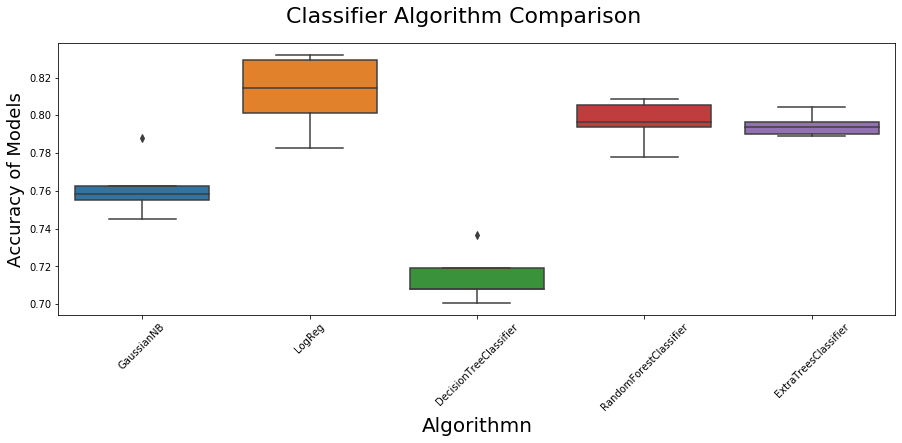

In [25]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


In [25]:
importancesname=['feature','LogReg','DecisionTrees','RandomForest','ExtraTrees']
importances=[importancesname,LogRegimportances.flatten(),DecisionTreesimportances,
 RandomForestimportances,ExtraTreesimportances]
report=[modelname,accuracyL, f1L, precisionL, recallL] 
import csv
with open('report.csv', 'w', newline='') as csvfile:
    writer= csv.writer(csvfile)
    writer.writerows(report)
with open('importances-c.csv', 'w', newline='') as csvfile:
    writer= csv.writer(csvfile)
    writer.writerows(importances)

In [13]:
## 匯出資料檔
import csv
data_name='G:/我的雲端硬碟/轉譯醫學/Data/MJ/Model_data.csv'
data.to_csv(data_name,index= False)

In [ ]:
##測試資料 (隨機抽樣200個sample)
test_health=data[(data.psick11==0)].sample(n=100, axis=0, random_state=5)

test_stroke=data[(data.psick11==1)].sample(n=100,axis=0, random_state=6)

test_sample=pd.concat([test_health,test_stroke], axis=0)
#'drinkornot_98' Drop因為已經合成新的欄位
test=np.array(test_sample.drop(['yr','pid','psick11','drinkornot_98'],axis=1))
test

### 驗證匯出模型 (LogReg)

####  joblib (網頁端會被鎖)
#### pickle

In [ ]:
#呼叫model
logistic_r = joblib.load('logistic_F2.pkl')
#預測資料
model_pred= logistic_r.predict(test)
label_test=np.array(test_sample.psick11)
# 測試資料,產生confusion_matrix
print(logistic_r)
print(model_pred)
#print(confusion_matrix(label_test, model_pred))
print(pd.crosstab(label_test, model_pred, rownames=['label'], colnames=['predict']))
print(f'Accuracy: {accuracy_score(label_test, model_pred)}')